<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.2 

## Statistical Proof

### Part 1: Student's t-Test

The *t*-test is probably the most used statistical test. It measures the likelihood that a sample belongs to a given distribution, and incorporates a correction for the finite size of the sample.

#### Using the t-test to compare two means

Here, suppose we have two sets of measurements and we want to know if they both came from the same distribution.

For example, in [this](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data) dataset these could be age of house in one group and median value of house in another group, and we are testing the null hypothesis that there is no difference between the two groups.

#### Collect Data

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

Data dictionary is available [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

In [89]:
import pandas as pd
import numpy as np
import math

from scipy import stats
from matplotlib import pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize': (15, 10)})

import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

%matplotlib inline

In [90]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv("housing.data", header=None, names=names, delim_whitespace=True)

In [91]:
import seaborn as sns

In [92]:
# Head
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [93]:
# Shape
data.shape

(506, 14)

##### 1. Plot Histogram of `RM`

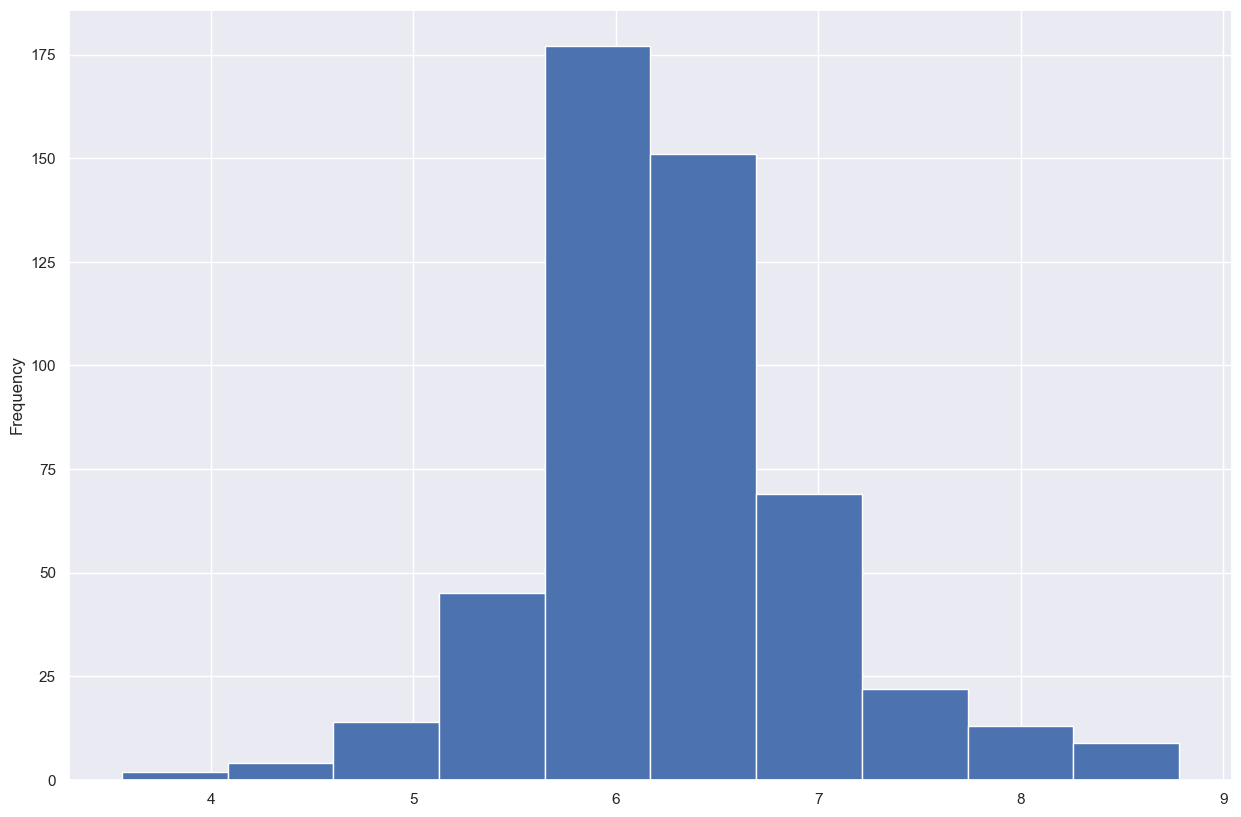

In [94]:
RM = data['RM']
RM.plot(kind='hist');

##### 2. Plot Histogram of `MEDV`

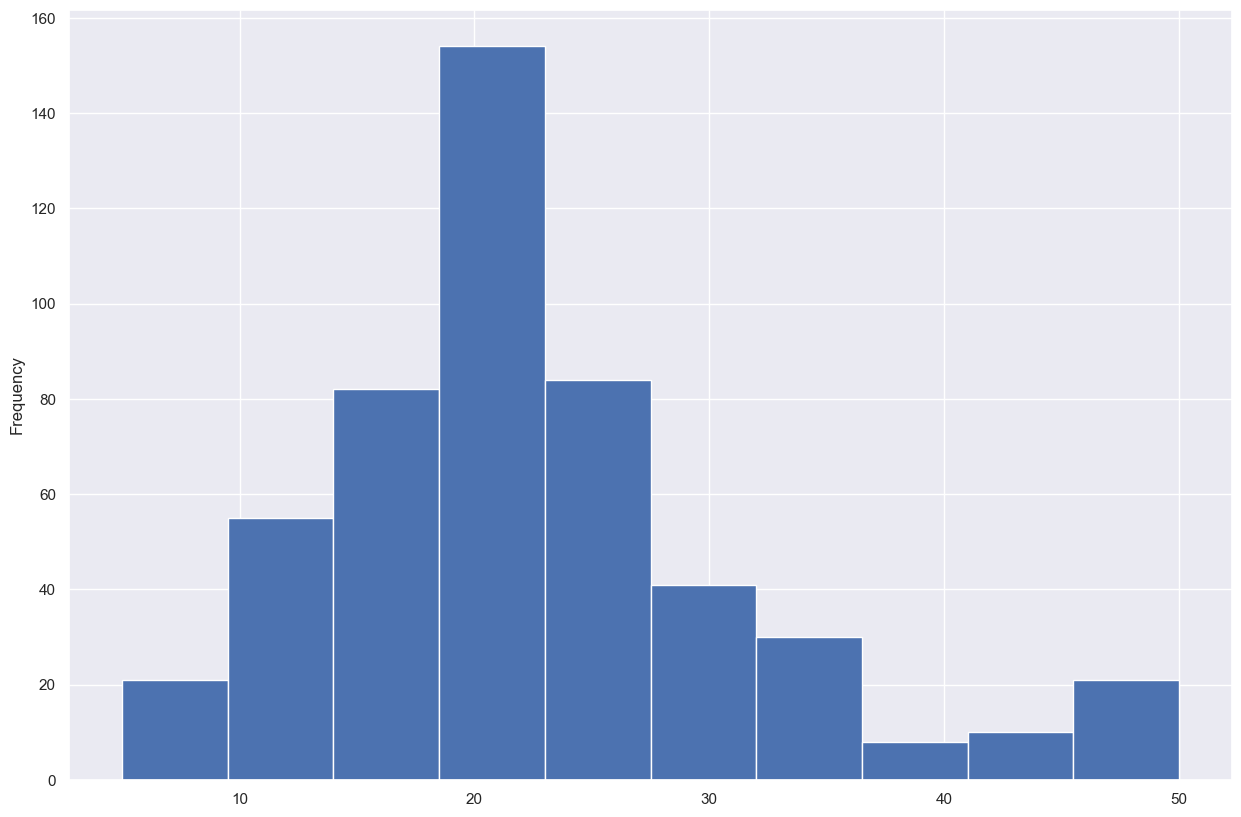

In [95]:
MEDV = data['MEDV']
MEDV.plot(kind='hist');

##### 3.A Draw Scatter Plot of `RM` & `MEDV`

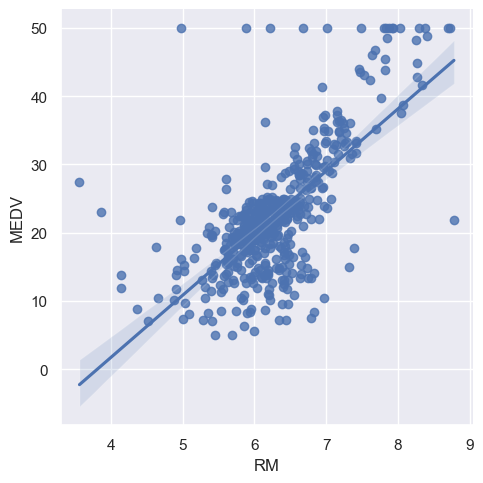

In [96]:
sns.lmplot(x="RM", y="MEDV", data=data);

In [97]:
data['RM'].mean()

6.284634387351787

##### 3.B Is there any trend? State your observation.There is a positive correlation between `RM` & `MEDV`. 

**ANSWER:**: ...

We'll be using following steps:

- Define hypothesis
- Set alpha (Let alpha = 0.05)
- Calculate point estimate
- Calculate test statistic
- Find the p-value
- Interpret results

##### 4. Define Hypothesis

Let's assume if `RM` of house is more than 6, they are large house. Other houses are small. Price of houses increases when the `RM` increases.

**ANSWER:**

    H0: There is no difference between distribution of `Large House` & `Small House`
    H1: There is difference between distribution of `Large House` & `Small House`
    
**[Note]** _If you want you can explore the dataset and define different hypothesis._

##### 5. Set alpha (Let alpha = 0.05)

First, we should specify our criterion for statistical significance. Traditionally, we allow for no more than a 1-in-20 chance of a spurious rejection of the null hypothesis:

In [98]:
alpha = 0.05 

##### 6. Set Data

Now, let's create two sets of data 
- Large House: House which have more than 6 rooms.
- Small House: House which have less than 6 rooms.

Take sample of 100 house in each dataste.

In [99]:
# ANSWER
N = 100
medv_over_6 = data[data['RM'] > 6]['MEDV'].sample(N)
medv_under_6 = data[data['RM'] <= 6]['MEDV'].sample(N)

##### 6.A [BONUS] Build histogram for both `Large House` & `Small House`

C:\Users\Leah Pettigrew\AppData\Local\Temp\ipykernel_1488\2062028438.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(medv_over_6, label='Large House', kde=False);
C:\Users\Leah Pettigrew\AppData\Local\Temp\ipykernel_1488\2062028438.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(med

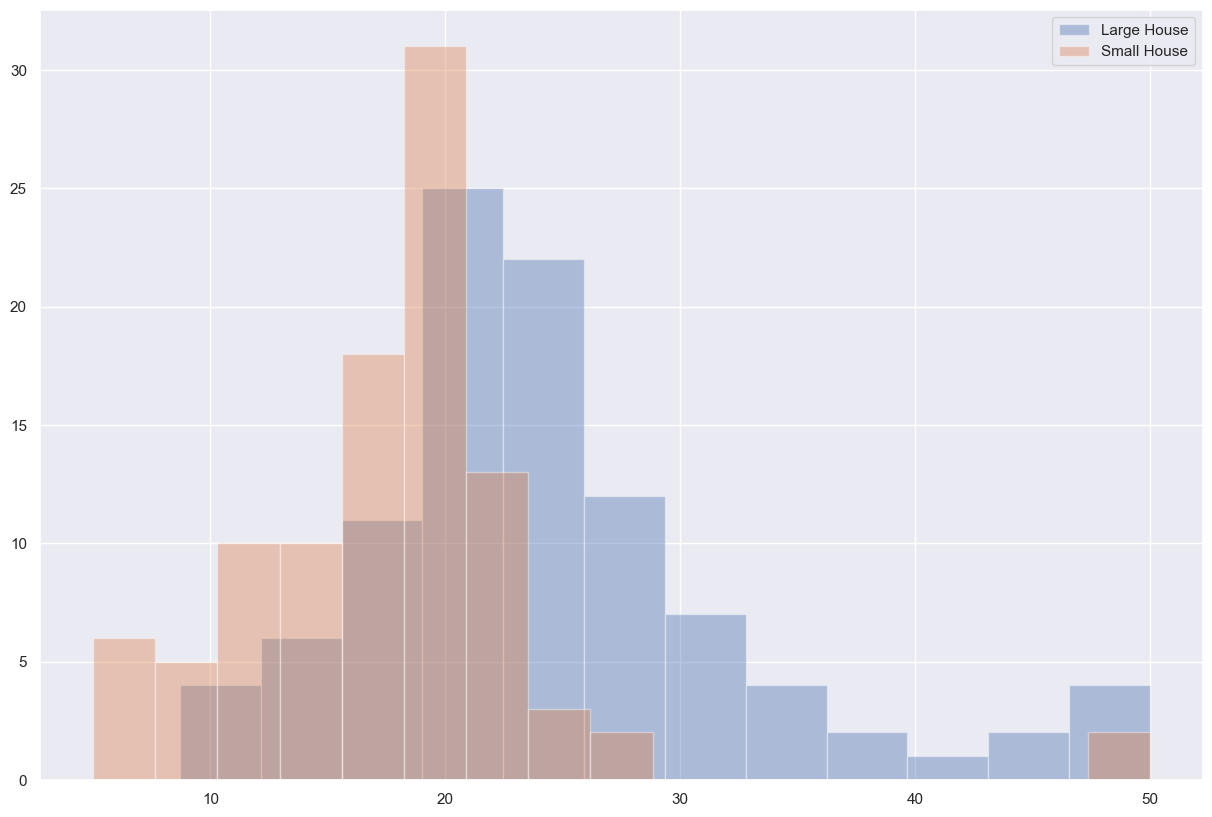

In [100]:
# ANSWER
ax = sns.distplot(medv_over_6, label='Large House', kde=False);
sns.distplot(medv_under_6, ax=ax, label='Small House', kde=False);
plt.legend(loc = 'upper right')
plt.xlabel('')
plt.ylabel('')
plt.show();

##### 7. Calculate Variance

Calculate variance for both samples.

In [101]:
# ANSWER
var_medv_over_6 = medv_over_6.var()
print(var_medv_over_6)
var_medv_under_6 = medv_under_6.var()
print(var_medv_under_6)

71.46159999999999
45.866152525252524


##### 8. Calculate Standard Deviation

In [102]:
# ddof should be 1
np.var(medv_over_6, ddof=1)

71.46159999999999

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f63e99c30c01445668ea2cce9832da0f6810cb4b)


Because we are dealing with two samples we need to compute the joint standard deviation. 

Here sp is the pooled standard deviation for n = n1 = n2 and s^2
X1 and s^2 X2 are the unbiased estimators of the variances of the two samples.

The *t*-statistic depends on the difference between the sample means and their joint standard deviation:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/070d365e1b347ea5f83f0147043868fa120b6646)


In [105]:
medv_under_6.std

<bound method NDFrame._add_numeric_operations.<locals>.std of 317    19.8
422    20.8
119    19.3
30     12.7
79     20.3
400     5.6
50     19.7
146    15.6
315    16.2
148    17.8
372    50.0
490     8.1
37     21.0
19     18.2
310    16.1
46     20.0
339    19.0
13     20.4
151    19.6
382    11.3
399     6.3
488    15.2
118    20.4
106    19.5
499    17.5
383    12.3
394    12.7
363    16.8
413    16.3
164    22.7
297    20.3
212    22.4
48     14.4
269    20.7
68     17.4
124    18.8
38     24.7
368    50.0
265    22.8
115    18.3
340    18.7
112    18.8
373    13.8
23     14.5
167    23.8
405     5.0
336    19.5
45     19.3
69     20.9
389    11.5
15     19.9
496    19.7
412    17.9
468    19.1
127    16.2
141    14.4
134    15.6
404     8.5
49     19.4
144    11.8
122    20.5
386    10.5
346    17.2
417    10.4
244    17.6
414     7.0
35     18.9
33     13.1
21     19.6
439    12.8
12     21.7
466    19.0
142    13.4
323    18.5
172    23.1
354    18.2
365    27.5
143    15.6
27

##### 9. Calculate test statistic

In [106]:
# ANSWER - will need some help with this one please - std doesn't seem to work
import numpy as np
t = (medv_over_6.mean() - medv_under_6.mean()) / (std * np.sqrt(2 / N))  # t-statistic
print('t:', t)

NameError: name 'std' is not defined

##### 10. Calculate Degree of Freedom

The number of degrees of freedom is the total number of samples (here, this is N from each set) minus the number of statistics in the computation (1 for each sample mean):

In [107]:
df = 2 * N - 2
df

198

##### 11. Find the p-value

Now we can compute the probability of the above *t*-statistic from the cumulative density function:

> stats.t.cdf

> p_value = 1 - cdf(t) 

In [108]:
# ANSWER
p = 1 - stats.t.cdf(abs(t), df=df)  # #p-value after comparison with the t 
print("t = " + str(t))
print("p = " + str(2 * p))

t = 8.638500149510662
p = 1.7763568394002505e-15


#### Interpret results

##### 12. Write a Function to Test Significance of `p_value`

Write a funtion which will take p_value and alpha as input. If p_value < alpha, print reject null hypothesis message. Otherwise print a fail to reject null hypothesis message. 

In [109]:
# ANSWER
# Null Hypothesis Dictionary
null_hypothesis = {
    'H0': "House price does not increase for large house."
    , 'H1': "House price increases for large house."
}

In [110]:
# ANSWER
def print_sig(p_value, alpha):
    '''
    Inputs:
    p_value: Calculated p_value
    alpha: Confidence level
    '''
    if p_value < alpha:
        print("We reject our null hypothesis.")
        print(null_hypothesis['H1'])
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
        print(null_hypothesis['H0'])
    else:
        print("Our test is inconclusive.")

In [111]:
# ANSWER
print("t = " + str(t))
print("p = " + str(p*2))
print_sig(p*2, alpha)

t = 8.638500149510662
p = 1.7763568394002505e-15
We reject our null hypothesis.
House price increases for large house.


##### 13. [Bonus] Write a function to calculate t, p_value from two samples.

Calculate the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values.

In [112]:
# ANSWER
def check_sig(p_value, alpha):
    '''
    Inputs:
    p_value: Calculated p_value
    alpha: Confidence level
    
    Returns:
    Significance message
    '''
    
    str_result = ''
    
    if p_value < alpha:
        str_result = "We reject our null hypothesis."
        str_result += '\n'
        str_result += null_hypothesis['H1']
    elif p_value > alpha:
        str_result = "We fail to reject our null hypothesis."
        str_result += '\n'
        str_result += null_hypothesis['H1']
    else:
        str_result = "Our test is inconclusive."
    
    return str_result

#### Use `Stats` Package

##### 14. Calculate the T-test for the means of *two independent* samples of scores

using following method of stats calculate the T-test for the means of two independent samples of scores.

> ttest_ind

In [113]:
# ANSWER
def check_sig(p_value, alpha):
    '''
    Inputs:
    p_value: Calculated p_value
    alpha: Confidence level
    
    Returns:
    Significance message
    '''
    
    str_result = ''
    
    if p_value < alpha:
        str_result = "We reject our null hypothesis."
        str_result += '\n'
        str_result += null_hypothesis['H1']
    elif p_value > alpha:
        str_result = "We fail to reject our null hypothesis."
        str_result += '\n'
        str_result += null_hypothesis['H1']
    else:
        str_result = "Our test is inconclusive."
    
    return str_result

In [114]:
# ANSWER
def ttest_ind(a, b, alpha=0.05):
    '''
    a, b: The arrays must have the same shape
    alpha: value of alpha
    '''
    N = len(a)
    
    # Calculate Variance
    var_a = a.var()
    var_b = b.var()
    
    # Calculate Standard Deviation     
    std = np.sqrt((var_a + var_b) / 2)
    
    # Calculate t-stat    
    t = (a.mean() - b.mean()) / (std * np.sqrt(2 / N))  # t-statistic
    
    # Calculate degree of freedom     
    df = 2 * N - 2
    
    # Calculate p-value
    p = 1 - stats.t.cdf(abs(t), df=df)  # #p-value after comparison with the t
    # Two-tail     
    p = p * 2
    
    return t, p, check_sig(p, alpha)

In [115]:
# ANSWER
t, p, sig = ttest_ind(medv_over_6, medv_under_6, alpha)
print("t = " + str(t))
print("p = " + str(p))
print(sig)

t = 6.45599451047423
p = 8.118423711067635e-10
We reject our null hypothesis.
House price increases for large house.




---



---



> > > > > > > > > © 2022 Institute of Data


---



---





In [116]:
# ANSWER
t2, p2 = stats.ttest_ind(medv_over_6, medv_under_6)
print("t = " + str(t2))
print("p = " + str(p2))
print_sig(p2, alpha)

t = 6.455994510474226
p = 8.118424855863561e-10
We reject our null hypothesis.
House price increases for large house.
